# Capital Asset Pricing Model

## Milestone 1

In [65]:
%reload_ext dotenv
%dotenv
%matplotlib inline

import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import yfinance as yf
from fredapi import Fred

sns.set()

FRED_API_KEY = os.getenv('FRED_API_KEY')

Download the closing prices of the desired symbols.

In [44]:
stocks_symbols = ['AAPL', 'IBM', 'MSFT', 'INTC', '^GSPC']
stocks = yf.download(stocks_symbols, start='2021-01-01', end='2021-04-01')
stocks = stocks['Close']
stocks = stocks.dropna()
stocks = stocks.rename(columns={'^GSPC': 'GSPC'})
stocks.describe()

[*********************100%***********************]  5 of 5 completed


,AAPL,IBM,INTC,MSFT,GSPC
count,62.000000,62.000000,62.000000,62.000000,62.000000
mean,128.427903,125.195968,59.438226,231.866613,3863.938563
std,6.726222,4.862788,4.248762,9.164177,71.994513
min,116.360001,118.580002,49.669998,212.250000,3700.649902
25%,121.984999,120.754999,57.107501,226.894997,3810.167542
50%,128.315002,124.060001,60.530001,233.525002,3873.589966
75%,133.752502,128.985004,62.827500,237.677505,3915.557556
max,143.160004,136.380005,65.779999,244.990005,3974.540039


Search for risk free rate data in the Federal Reserve Economic Data:

In [45]:
fred = Fred(api_key=FRED_API_KEY)
fred.search('risk free')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
DGS10,DGS10,2021-07-14,2021-07-14,10-Year Treasury Constant Maturity Rate,1962-01-02,2021-07-12,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2021-07-13 15:23:11-05:00,97,For further information regarding treasury con...
GS10,GS10,2021-07-14,2021-07-14,10-Year Treasury Constant Maturity Rate,1953-04-01,2021-06-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2021-07-01 15:22:22-05:00,76,Averages of business days. For further informa...
WGS10YR,WGS10YR,2021-07-14,2021-07-14,10-Year Treasury Constant Maturity Rate,1962-01-05,2021-07-09,"Weekly, Ending Friday",W,Percent,%,Not Seasonally Adjusted,NSA,2021-07-12 15:21:11-05:00,61,Averages of business days. For further informa...
DGS1,DGS1,2021-07-14,2021-07-14,1-Year Treasury Constant Maturity Rate,1962-01-02,2021-07-12,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2021-07-13 15:23:21-05:00,79,For further information regarding treasury con...
DGS5,DGS5,2021-07-14,2021-07-14,5-Year Treasury Constant Maturity Rate,1962-01-02,2021-07-12,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2021-07-13 15:23:04-05:00,78,For further information regarding treasury con...
WGS1YR,WGS1YR,2021-07-14,2021-07-14,1-Year Treasury Constant Maturity Rate,1962-01-05,2021-07-09,"Weekly, Ending Friday",W,Percent,%,Not Seasonally Adjusted,NSA,2021-07-12 15:22:17-05:00,56,Averages of business days. For further informa...
GS1,GS1,2021-07-14,2021-07-14,1-Year Treasury Constant Maturity Rate,1953-04-01,2021-06-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2021-07-01 15:22:38-05:00,51,Averages of business days. For further informa...
GS5,GS5,2021-07-14,2021-07-14,5-Year Treasury Constant Maturity Rate,1953-04-01,2021-06-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2021-07-01 15:22:35-05:00,53,Averages of business days. For further informa...
WGS5YR,WGS5YR,2021-07-14,2021-07-14,5-Year Treasury Constant Maturity Rate,1962-01-05,2021-07-09,"Weekly, Ending Friday",W,Percent,%,Not Seasonally Adjusted,NSA,2021-07-12 15:22:21-05:00,49,Averages of business days. For further informa...


We are interested in `DGS3MO`, as it is a government-issued and widely applicable rate.

In [46]:
risk_free = fred.get_series('DGS3MO')
risk_free = risk_free['2021-01-01':'2021-04-01']

## Milestone 2

The purpose of this milestone is to calculate excess returns. To do that, we need:
- calculate stock returns as percentage
- convert risk free rate to daily value
- subtract each other

But first, some visualizations. Here are the trends of the downloaded stocks:

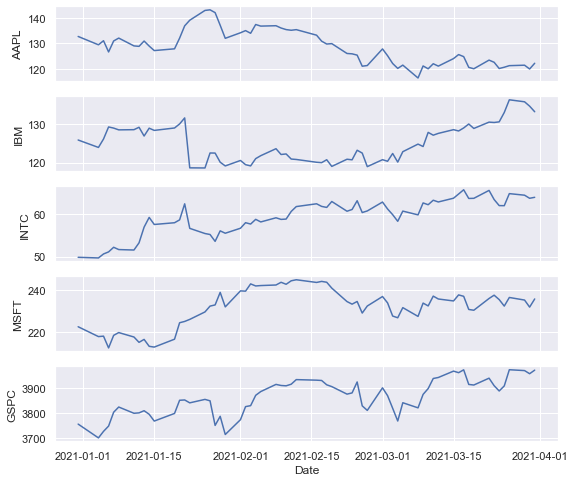

In [47]:
fig, axes = plt.subplots(5, 1, sharex=True, figsize=(9, 8))
for i in range(5):
    sns.lineplot(data=stocks.iloc[:, i], ax=axes[i])

Let's also visualize the correlation between stocks. See how similar are the trends for Intel and SP500. Apple on the other hand is quite different.

<AxesSubplot:>

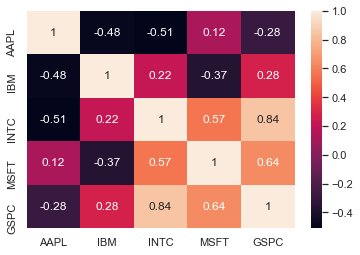

In [48]:
sns.heatmap(stocks.corr(), annot=True)

Let's start now start the journey to calculate excess returns. We start with the stock returns. Pandas provide a function `pct_change` to calculate those. We will just need to drop the first value as it will be `NaN` (as it cannot be compared to prior element).

In [49]:
stock_returns = stocks.pct_change()
stock_returns = stock_returns.dropna()
stock_returns

,AAPL,IBM,INTC,MSFT,GSPC
Date,,,,,
2021-01-04,-0.024719,-0.015411,-0.003011,-0.021266,-0.014755
2021-01-05,0.012364,0.017750,0.018925,0.000965,0.007083
2021-01-06,-0.033662,0.024972,0.009682,-0.025929,0.005710
2021-01-07,0.034123,-0.002320,0.021331,0.028457,0.014847
2021-01-08,0.008631,-0.003566,-0.010347,0.006093,0.005492
...,...,...,...,...,...
2021-03-25,0.004164,0.018757,-0.000322,-0.013251,0.005240
2021-03-26,0.005141,0.024874,0.045953,0.017819,0.016631
2021-03-29,0.001485,-0.003813,-0.005704,-0.005244,-0.000868


We've already downloaded `risk_free` data in Milestone 1. It spans over 3 months. Let's make it a daily rate and also delete the last row, because it goes one day over the end of our stocks data.

<AxesSubplot:>

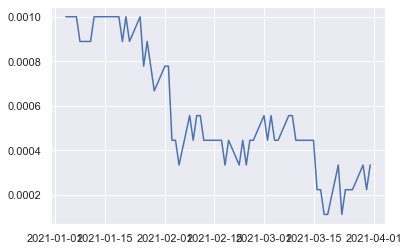

In [50]:
risk_free_daily = risk_free / 90
risk_free_daily = risk_free_daily.dropna()
risk_free_daily = risk_free_daily.iloc[:-1]
sns.lineplot(data=risk_free_daily)


In [51]:
excess_returns = stock_returns.sub(risk_free_daily, axis=0)
excess_returns

,AAPL,IBM,INTC,MSFT,GSPC
Date,,,,,
2021-01-04,-0.025719,-0.016411,-0.004011,-0.022266,-0.015755
2021-01-05,0.011364,0.016750,0.017925,-0.000035,0.006083
2021-01-06,-0.034662,0.023972,0.008682,-0.026929,0.004710
2021-01-07,0.033123,-0.003320,0.020331,0.027457,0.013847
2021-01-08,0.007742,-0.004455,-0.011236,0.005204,0.004603
...,...,...,...,...,...
2021-03-25,0.003941,0.018535,-0.000545,-0.013473,0.005018
2021-03-26,0.004919,0.024652,0.045731,0.017596,0.016409
2021-03-29,0.001152,-0.004146,-0.006037,-0.005577,-0.001201


## Milestone 3

In this milestone, we calculate the CAPM of our stocks with the help of the `statsmodels` library.

In [68]:
endog = excess_returns['AAPL']
exog = sm.add_constant(excess_returns['GSPC'])
CAPM_AAPL = sm.OLS(endog, exog).fit()

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [74]:
X = excess_returns['IBM']
y = sm.add_constant(excess_returns['GSPC'])
CAPM_IBM = sm.OLS(X, y).fit()

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [79]:
X = excess_returns['INTC']
y = sm.add_constant(excess_returns['GSPC'])
CAPM_INTC = sm.OLS(X, y).fit()

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [80]:
X = excess_returns['MSFT']
y = sm.add_constant(excess_returns['GSPC'])
CAPM_MSFT = sm.OLS(X, y).fit()

## Useful links

- [Risk Free Rate and Fama French factors](https://bizlib247.wordpress.com/2013/01/18/risk-free-rate-and-fama-french-factors/)
- [`endog`, `exog`, what’s that?](https://www.statsmodels.org/stable/endog_exog.html)
- [Ordinary Least Squares linear regression](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS)
- [How to Version Control Jupyter Notebooks](https://nextjournal.com/schmudde/how-to-version-control-jupyter)
